In [17]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


# Read in the p064_matter.csv file 
data =[]
with open("p061_matter.csv") as f:
#with open("p065_matter.csv") as f:
    data = f.readlines()
header = data[0]
data = data[1:]

In [35]:
# Read the CCEP data into a pandas dataframe. It is in xlsx format
df = pd.read_excel(r"Z:\user home\Roberto\NeuralFigures\P061\CCEP\2023-05-22\Bipolar\Ref 54\Peak locations and amplitudes\6mA.xlsx", sheet_name=None)

In [36]:
df['S1']

,Unnamed: 0,Locations,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Amplitudes,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Post-stim z-scores,Unnamed: 14,Unnamed: 15
0,Channel,N1,N2,P1,P2,NaN,Channel,N1,N2,P1,P2,NaN,Channel,N1 z-score,Max z-score,Location
1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,-13.48,0.008
2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,108,0.047,0.238,0.1,0.348,NaN,108,-37.7,-25.33,28.96,5.37,NaN,108,-3.04,-3.04,0.047
109,109,0.0435,0.173,0.1,0.348,NaN,109,-38.35,-21.95,26.78,7.32,NaN,109,-3.23,-3.23,0.0435
110,110,0.0435,0.2245,0.1,0.348,NaN,110,-31.17,-24.95,29.68,6.44,NaN,110,-4.16,-4.16,0.0435
111,111,0.047,0.2245,0.1,0.3535,NaN,111,-21.39,-26.72,37.09,5.43,NaN,111,-5.28,-6.2,0.2245


In [20]:
# The data is organized in two sets of columns. The first are the "times" in a particular time unit (not sure yet, probably seconds?) and the second set are measured voltage amplitudes.
# If a data point is set to NaN, that means it was not measurable. We will deal with this in the plot.

,Unnamed: 0,Locations,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Amplitudes,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Post-stim z-scores,Unnamed: 14,Unnamed: 15
0,Channel,N1,N2,P1,P2,NaN,Channel,N1,N2,P1,P2,NaN,Channel,N1 z-score,Max z-score,Location
1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,-13.48,0.008
2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,108,0.047,0.238,0.1,0.348,NaN,108,-37.7,-25.33,28.96,5.37,NaN,108,-3.04,-3.04,0.047
109,109,0.0435,0.173,0.1,0.348,NaN,109,-38.35,-21.95,26.78,7.32,NaN,109,-3.23,-3.23,0.0435
110,110,0.0435,0.2245,0.1,0.348,NaN,110,-31.17,-24.95,29.68,6.44,NaN,110,-4.16,-4.16,0.0435
111,111,0.047,0.2245,0.1,0.3535,NaN,111,-21.39,-26.72,37.09,5.43,NaN,111,-5.28,-6.2,0.2245


In [2]:
data

['1,LA1,Left,Amygdala,146,147,144,G,Left-Amygdala,Left-Amygdala\n',
 '2,LA2,Left,Amygdala,150,146,144,G,Left-Amygdala,Left-Amygdala\n',
 '3,LA3,Left,Amygdala,156,146,145,G,Left-Amygdala,Left-Amygdala\n',
 '4,LA4,Left,Amygdala,160,146,146,G,Left-Amygdala,Left-Amygdala\n',
 '5,LA5,Left,Amygdala,166,147,146,W,wm-lh-insula,Left-Cerebral-White-Matter\n',
 '6,LA6,Left,Amygdala,171,147,147,W,wm-lh-inferiortemporal,Left-Cerebral-White-Matter\n',
 '7,LA7,Left,Amygdala,176,146,148,W,Left-UnsegmentedWhiteMatter,Left-Cerebral-White-Matter\n',
 '8,LA8,Left,Amygdala,180,146,148,W,wm-lh-superiortemporal,Left-Cerebral-White-Matter\n',
 '9,LA9,Left,Amygdala,186,146,149,W,wm-lh-middletemporal,Left-Cerebral-White-Matter\n',
 '10,LA10,Left,Amygdala,190,145,150,G,ctx-lh-middletemporal,ctx_lh_G_temporal_middle\n',
 '11,LHH1,Left,HippocampusHead,152,151,134,W,wm-lh-parahippocampal,Left-Cerebral-White-Matter\n',
 '12,LHH2,Left,HippocampusHead,157,152,134,W,wm-lh-parahippocampal,Left-Cerebral-White-Matter\n',


In [14]:
coords = {}
contactNames = {}
for line in data:
    line = line.split(",")
    coords[line[1]] = [float(line[4]), float(line[5]), float(line[6])]
    contactNames[line[0]] = line[1]

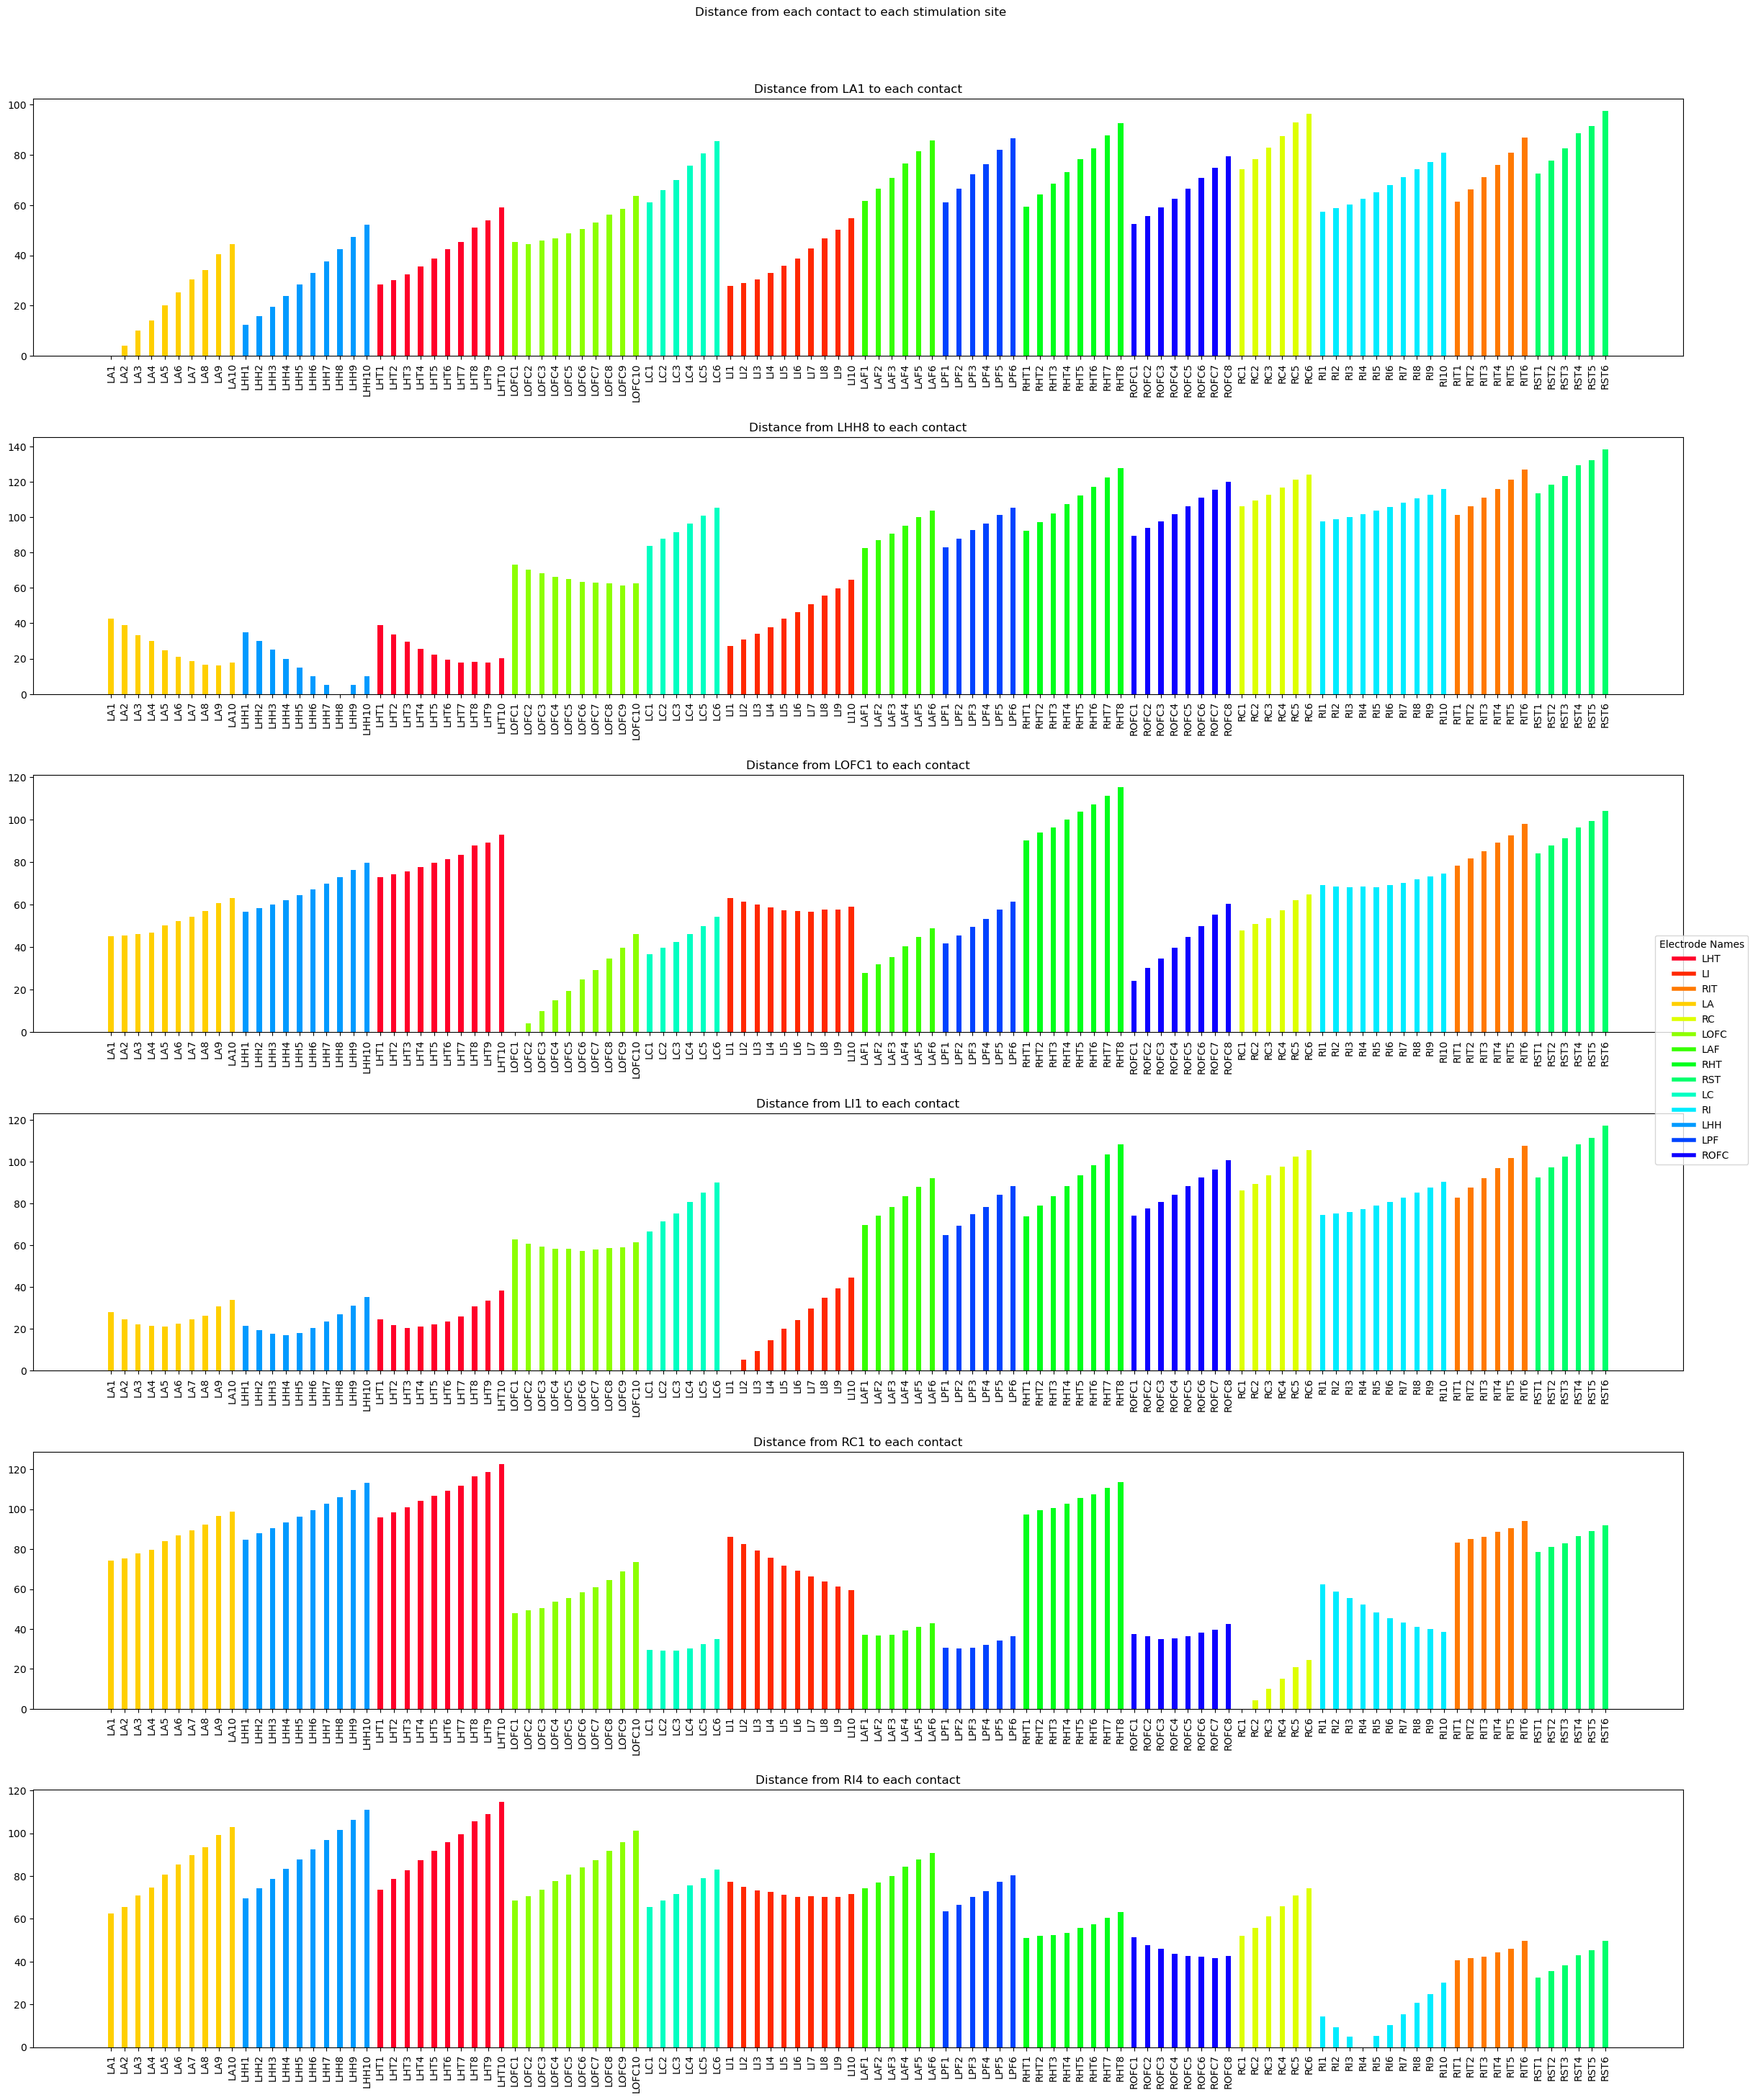

In [16]:
# The stimulating electrodes are:
# Bipolar
# LAMY4, LAMY5
# LHH4, LHH5
# LHT4, LHT5
# LC8, LC9
# RHH1, RHH2
# RFC1, RFC2

# Monopolar
# LAMY4
# LHH4
# LHT4
# LC8
# RHH1
# RFC1

# Reference electrode is 101, which is RF3
# Other reference electrode is a scalp one, which we'll have to get manually from the eeg techs.

# We want to calculate the distance of every electrode from the stimulating electrodes
# Let's start with monopolar to keep it simple.
stimElectrodeNumbers = [1, 18, 31, 47, 85, 94] # p061
stimElectrodes = [contactNames[str(x)] for x in stimElectrodeNumbers]
#stimElectrodes = ["LAMY4", "LHH4", "LHT4", "LC8", "RHH1", "RFC1"] # p064
#stimElectrodes = ["LAMY7", "LOFCH3", "LACF2", "RAMY6", "RHH8"] p065

refElectrode = "RF3"
# We also want to assign unique colors to each electrode.
names = []
for line in data:
    line = line.split(",")
    name = line[1]
    # Remove the number from the electrode name
    name = ''.join([i for i in name if not i.isdigit()])
    names.append(name)

names = list(set(names)) # Reduce it down to unique names
# Now we want to assign a color to each electrode, make it a dictionary.
# Start with base colors, then combinations of colors.
colors = {}
base = 0.06
for idx, name in enumerate(names):
    colors[name] = plt.cm.gist_rainbow((base * idx))

distances =  {} # Each key will be a stimulating electrode, and the value will be a list of distances to each electrode, in order. This is a tuple with the receiving electrode name.
for stim in stimElectrodes:
    distances[stim] = []
    for electrode in coords.keys():
        if electrode == refElectrode:
            continue
        distances[stim].append((electrode, np.linalg.norm(np.array(coords[stim]) - np.array(coords[electrode]))))


fig, ax = plt.subplots(len(distances), 1, figsize=(25, 30))
fig.suptitle("Distance from each contact to each stimulation site")
fig.tight_layout(pad=6.0)
for idx, stimElectrode in enumerate(distances):
    #distances[stimElectrode].sort(key = lambda x: x[1])
    ax[idx].bar([x[0] for x in distances[stimElectrode]], [x[1] for x in distances[stimElectrode]], width=0.4, color=[colors[''.join([i for i in x[0] if not i.isdigit()])] for x in distances[stimElectrode]])
    #plt.bar([x[0] for x in distances[stimElectrode]], [x[1] for x in distances[stimElectrode]], width=0.4)
    ax[idx].set_xticks([x[0] for x in distances[stimElectrode]])
    ax[idx].set_xticklabels([x[0] for x in distances[stimElectrode]], rotation=90)
    ax[idx].set_title("Distance from " + stimElectrode + " to each contact")
# Force all names to appear in the legend
fig.legend([plt.Line2D([0], [0], color=colors[''.join([i for i in x if not i.isdigit()])], lw=4) for x in names], names, loc="center right", title="Electrode Names")